### load library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from tensorflow import keras
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.losses import categorical_crossentropy
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

### Load dataset 

In [3]:
train_data_path = '../emnist_input/emnist-balanced-train.csv'
test_data_path = '../emnist_input/emnist-balanced-test.csv'

In [4]:
train_data = pd.read_csv(train_data_path, header=None)

In [5]:
train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# The classes of this balanced dataset are as follows. Index into it based on class label
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
# source data: https://arxiv.org/pdf/1702.05373.pdf

In [7]:
class_mapping[34]

'Y'

In [8]:
train_data.shape

(112800, 785)

### Data is flipped

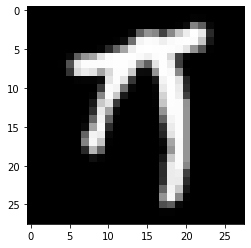

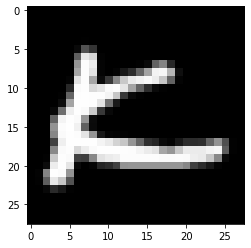

In [9]:
num_classes = len(train_data[0].unique())
row_num = 8

plt.imshow(train_data.values[row_num, 1:].reshape([28, 28]), cmap='Greys_r')
plt.show()

img_flip = np.transpose(train_data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
plt.imshow(img_flip, cmap='Greys_r')

plt.show()

In [10]:
def show_img(data, row_num):
    img_flip = np.transpose(data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
    plt.title('Class: ' + str(data.values[row_num,0]) + ', Label: ' + str(class_mapping[data.values[row_num,0]]))
    plt.imshow(img_flip, cmap='Greys_r')

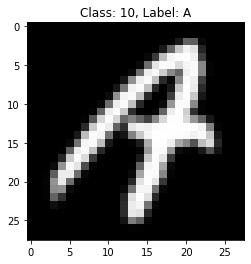

In [11]:
show_img(train_data, 149)

In [12]:
# 10 digits, 26 letters, and 11 capital letters that are different looking from their lowercase counterparts
num_classes = 47 
img_size = 28

def img_label_load(data_path, num_classes=None):
    data = pd.read_csv(data_path, header=None)
    data_rows = len(data)
    if not num_classes:
        num_classes = len(data[0].unique())
    
    # this assumes square imgs. Should be 28x28
    img_size = int(np.sqrt(len(data.iloc[0][1:])))
    
    # Images need to be transposed. This line also does the reshaping needed.
    imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3]) # img_size * img_size arrays
    
    labels = keras.utils.to_categorical(data.values[:,0], num_classes) # one-hot encoding vectors
    
    return imgs/255., labels



### model, compile

In [13]:
model = keras.models.Sequential()

# model.add(keras.layers.Reshape((img_size,img_size,1), input_shape=(784,)))
model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', 
                              input_shape=(img_size,img_size,1)))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 12)        312       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 18)          1962      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 18)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 24)          1752      
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               5

In [14]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())


[None, 12, 12, 12]
[None, 12, 12, 12]
[None, 5, 5, 18]
[None, 5, 5, 18]
[None, 4, 4, 24]
[None, 384]
[None, 150]
[None, 47]


### Train

In [15]:
X, y = img_label_load(train_data_path)
print(X.shape)

(112800, 28, 28, 1)


In [16]:
data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2)
## consider using this for more variety
data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.2, height_shift_range=.2,
                                            rotation_range=60, zoom_range=.2, shear_range=.3)

# if already ran this above, no need to do it again
# X, y = img_label_load(train_data_path)
# print("X.shape: ", X.shape)

training_data_generator = data_generator.flow(X, y, subset='training')
validation_data_generator = data_generator.flow(X, y, subset='validation')
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=10, # can change epochs to 5
                              validation_data=validation_data_generator)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
500/500 [==============================] - 3s 6ms/step - loss: 2.4830 - accuracy: 0.3297 - val_loss: 1.3892 - val_accuracy: 0.5965
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 1.4722 - accuracy: 0.5693 - val_loss: 1.0479 - val_accuracy: 0.6895
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 1.1846 - accuracy: 0.6422 - val_loss: 0.8865 - val_accuracy: 0.7247
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 1.0418 - accuracy: 0.6765 - val_loss: 0.7923 - val_accuracy: 0.7513
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 0.9474 - accuracy: 0.6989 - val_loss: 0.7201 - val_accuracy: 0.7668
Epoch 6/10
500/500 [====

In [17]:
test_X, test_y = img_label_load(test_data_path)
test_data_generator = data_generator.flow(X, y)

model.evaluate_generator(test_data_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.5791138410568237, 0.802180826663971]

### Look at some predictions


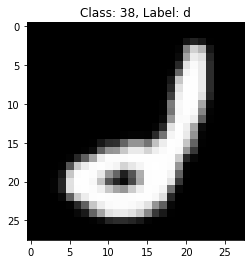

In [18]:
test_data = pd.read_csv(test_data_path, header=None)
show_img(test_data, 123)

In [19]:
X_test, y_test = img_label_load(test_data_path) # loads images and orients for model

In [20]:
def run_prediction(idx):
    result = np.argmax(model.predict(X_test[idx:idx+1]))
    print('Prediction: ', result, ', Char: ', class_mapping[result])
    print('Label: ', test_data.values[idx,0])
    show_img(test_data, idx)

Prediction:  1 , Char:  1
Label:  1
Prediction:  39 , Char:  e
Label:  39
Prediction:  12 , Char:  C
Label:  12
Prediction:  39 , Char:  e
Label:  39
Prediction:  5 , Char:  5
Label:  5
Prediction:  44 , Char:  q
Label:  16
Prediction:  12 , Char:  C
Label:  12
Prediction:  28 , Char:  S
Label:  28
Prediction:  41 , Char:  g
Label:  44


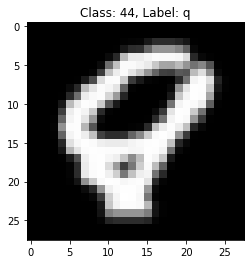

In [21]:
import random

for _ in range(1,10):
    idx = random.randint(0, 47-1)
    run_prediction(idx)

38

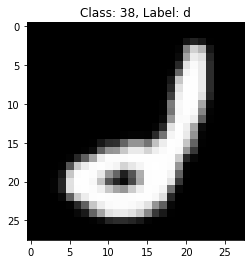

In [22]:
show_img(test_data, 123)
np.argmax(y_test[123])

### Keras exports

In [23]:
with open('model.json', 'w') as f:
    f.write(model.to_json())
model.save_weights('./model.h5')

model.save('./full_model.h5')
!dir
# .. or !ls -al on linux/macos

 Volume in drive C is Windows
 Volume Serial Number is CCBB-47BE

 Directory of C:\Users\robin\Desktop\emnist_fit\emnist_code

01/08/2021  17:21    <DIR>          .
01/08/2021  17:21    <DIR>          ..
01/08/2021  21:09            87,466 emnist-keras.ipynb
01/08/2021  21:10           874,384 full_model.h5
01/08/2021  21:10           299,496 model.h5
01/08/2021  21:10             3,274 model.json
01/08/2021  18:43           277,270 model.onnx
               5 File(s)      1,541,890 bytes
               2 Dir(s)  80,026,927,104 bytes free


### Keras to ONNX


In [24]:
import keras2onnx

# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, model.name)

# save onnx model
model_file = 'model.onnx'
keras2onnx.save_model(onnx_model, model_file)


tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 25 -> 15
The maximum opset needed by this model is only 11.


### Upload the ONNX file at Sclbl.net ...

### ... then test with Protobuf input

In [25]:
import requests
import base64
from onnx import numpy_helper

# serialize and base64 encode protobuf input

xc = X_test[127]
xc = xc.astype('float32')
tensor = numpy_helper.from_array(xc)
serialized = tensor.SerializeToString()
encoded = base64.b64encode(serialized)

# then test the model on a sclbl.net cloud server

url = "https://taskmanager.sclbl.net:8080/task/41bdf0a9-51e7-11eb-962f-9600004e79cc"
payload = "{\"input\":{\"content-type\":\"json\",\"location\":\"embedded\",\"data\":\"{\\\"input\\\": \\\"" + encoded.decode('ascii') + "\\\"}\"},\"output\":{\"content-type\":\"json\",\"location\":\"echo\"},\"control\":1,\"properties\":{\"language\":\"WASM\"}}"

response = requests.request("POST", url, data = payload)

print(response.text.encode('utf8'))
print("Expected result: " + str(np.argmax(y_test[127])))

b'{"statusCode":1,"result":"{\\"output\\": [0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0119,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0005,0.0000,0.9866,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000]}","tid":"sclblt-41bdf0a9-51e7-11eb-962f-9600004e79cc-87","message":"ComputeNode assigned successfully. Result returned and available at https://taskmanager.sclbl.net:8080/retrieve/sclblt-41bdf0a9-51e7-11eb-962f-9600004e79cc-87","timeOut":false,"resultUrl":"https://taskmanager.sclbl.net:8080/retrieve/sclblt-41bdf0a9-51e7-11eb-962f-9600004e79cc-87"}\n'
Expected result: 38


### ... or with raw input

In [26]:
# serialize and base64 encode raw input

xc = X_test[127]
xc = xc.astype('float32')
raw = xc.tobytes();
encoded = base64.b64encode(raw)

# then test the model on a sclbl.net cloud server

url = "https://taskmanager.sclbl.net:8080/task/41bdf0a9-51e7-11eb-962f-9600004e79cc"
payload = "{\"input\":{\"content-type\":\"json\",\"location\":\"embedded\",\"data\":\"{\\\"type\\\":\\\"raw\\\",\\\"input\\\": \\\"" + encoded.decode('ascii') + "\\\"}\"},\"output\":{\"content-type\":\"json\",\"location\":\"echo\"},\"control\":1,\"properties\":{\"language\":\"WASM\"}}"

response = requests.request("POST", url, data = payload)

print(response.text.encode('utf8'))
print("Expected result: " + str(np.argmax(y_test[127])))

b'{"statusCode":1,"result":"{\\"output\\": [0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0119,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0005,0.0000,0.9866,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000]}","tid":"sclblt-41bdf0a9-51e7-11eb-962f-9600004e79cc-88","message":"ComputeNode assigned successfully. Result returned and available at https://taskmanager.sclbl.net:8080/retrieve/sclblt-41bdf0a9-51e7-11eb-962f-9600004e79cc-88","timeOut":false,"resultUrl":"https://taskmanager.sclbl.net:8080/retrieve/sclblt-41bdf0a9-51e7-11eb-962f-9600004e79cc-88"}\n'
Expected result: 38
